In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
gc.collect()

15

In [3]:
sns.set(style="white")

In [4]:
path = "../data/"
filename = "combined_data_con_id.gzip"
filepath = path + filename
filepath

'../data/combined_data_con_id.gzip'

In [5]:
%%time
df = pd.read_parquet(filepath)
df.head()

Wall time: 37.6 s


,id_movie,id_client,rate,rate_day
0,1,822109,5,2005-05-13
1,1,885013,4,2005-10-19
2,1,30878,4,2005-12-26
3,1,823519,3,2004-05-03
4,1,893988,3,2005-11-17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480506 entries, 0 to 100480505
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   id_movie   int64 
 1   id_client  int64 
 2   rate       int64 
 3   rate_day   object
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [7]:
df.describe()

,id_movie,id_client,rate
count,1.004805e+08,1.004805e+08,1.004805e+08
mean,9.070915e+03,1.322489e+06,3.604290e+00
std,5.131891e+03,7.645368e+05,1.085219e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,4.677000e+03,6.611980e+05,3.000000e+00
50%,9.051000e+03,1.319012e+06,4.000000e+00
75%,1.363500e+04,1.984455e+06,4.000000e+00
max,1.777000e+04,2.649429e+06,5.000000e+00


In [8]:
df.shape

(100480506, 4)

In [9]:
estimators=['mean', 'median', 'mode']
def aplicate_estimators(serie, estimators=estimators, do_print=True):
    # La moda devuelte una serie en vez de directamente el valor :(
    results = []
    for est in estimators:
        result = serie.agg(func=est)
        if est == 'mode':
            result = result[0]
        if do_print:
            print('The {} {} is: {}'.format(serie.name, est, result))
        results.append(result)
    return results

def print_how_many(serie, txt='', serie_name=True):
    # El texto es de la forma:
    # 'La cantidad de pasajeros que tenian entre padres e hijos' tanto en total es tanto
    counts = serie.value_counts()
    values = list(serie.dropna().unique())
    values.sort()
    if serie_name:
        for val in values:
            print(txt + ' {} {}s: {}'.format(val, serie.name, counts.loc[val]))
    else:
        for val in values:
            print(txt + ' {}: {}'.format(val, counts.loc[val]))


# ID_CLIENT

In [10]:
df['id_client'].nunique()

480189

In [11]:
df_client = df.groupby('id_client')['id_movie'].count()
df_client.head()

id_client
6     626
7     881
8      98
10    260
25     27
Name: id_movie, dtype: int64

In [12]:
df_client.shape

(480189,)

<AxesSubplot:xlabel='id_movie', ylabel='Count'>

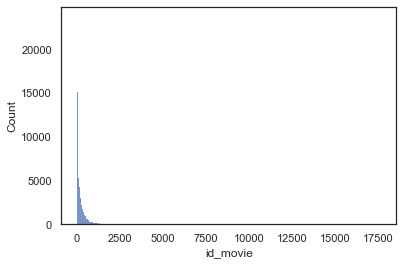

In [13]:
sns.histplot(df_client)

Text(0, 0.5, 'Conteo')

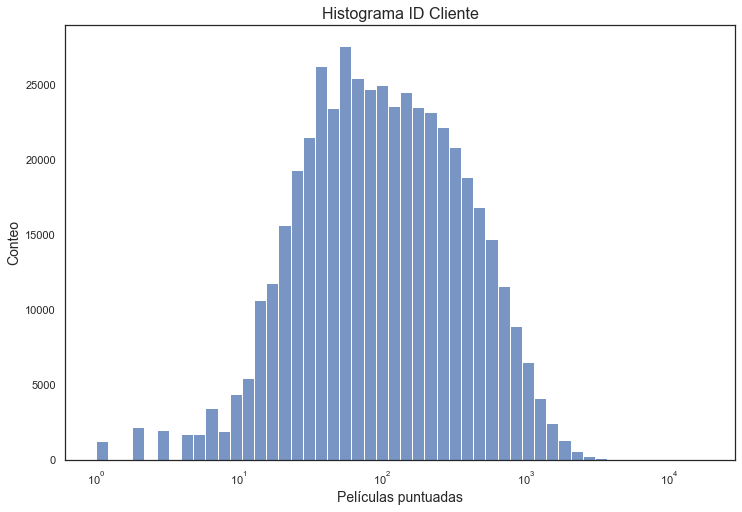

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(df_client,log_scale=False,bins=50)
plt.title('Histograma ID Cliente', fontsize=16)
# Configurar título y etiquetas
plt.xlabel('Películas puntuadas', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

Text(0, 0.5, 'Conteo')

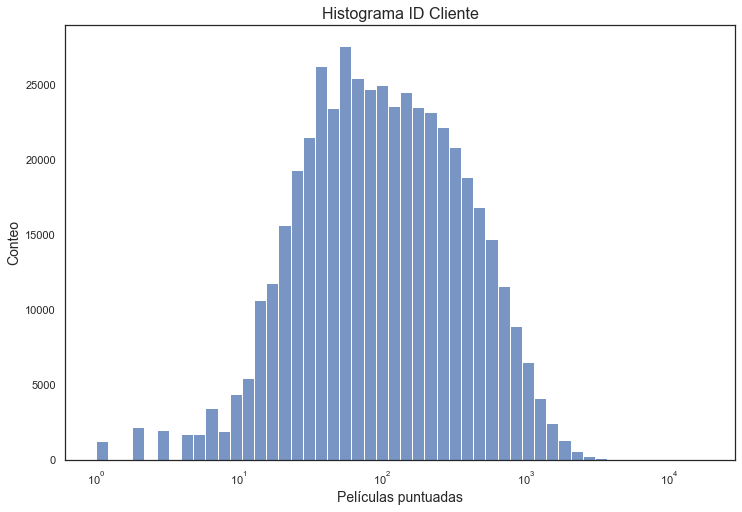

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(df_client,log_scale=True,bins=50)
plt.title('Histograma ID Cliente', fontsize=16)
# Configurar título y etiquetas
plt.xlabel('Películas puntuadas', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

<AxesSubplot:xlabel='id_movie', ylabel='Count'>

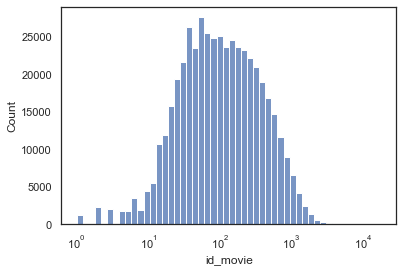

In [15]:
sns.histplot(df_client,log_scale=True,bins=50)

In [16]:
df_client.describe()

count    480189.000000
mean        209.251995
std         302.339142
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: id_movie, dtype: float64

In [52]:
df_client.nlargest(20)

id_client
305344     17653
387418     17436
2439493    16565
1664010    15813
2118461    14831
1461435     9822
1639792     9767
1314869     9740
2606799     9064
1932594     8880
2056022     8387
1114324     8322
752642      7481
491531      7257
1663888     7080
727242      6997
1403217     6844
1473980     6790
798296      6740
716173      6736
Name: id_movie, dtype: int64

In [18]:
for exp in [10**i for i in range(6)]:
    print(f"Menores que {exp}: {df_client[df_client < exp].shape[0]}\nMayores que {exp}: {df_client[df_client > exp].shape[0]}\n")

Menores que 1: 0
Mayores que 1: 478920

Menores que 10: 16419
Mayores que 10: 461444

Menores que 100: 244072
Mayores que 100: 234909

Menores que 1000: 467048
Mayores que 1000: 13100

Menores que 10000: 480184
Mayores que 10000: 5

Menores que 100000: 480189
Mayores que 100000: 0



# ID_MOVIE

In [19]:
df_movie = df.groupby('id_movie')['id_client'].count()
df_movie.head()

id_movie
1     546
2     145
3    2012
4     142
5    1140
Name: id_client, dtype: int64

In [20]:
df_movie.shape

(17770,)

<AxesSubplot:xlabel='id_client', ylabel='Count'>

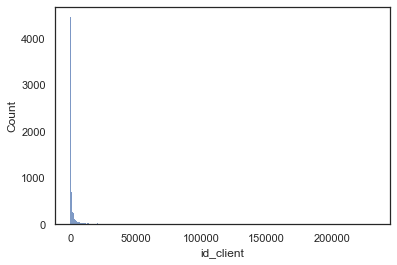

In [21]:
sns.histplot(df_movie)

<AxesSubplot:xlabel='id_client', ylabel='Count'>

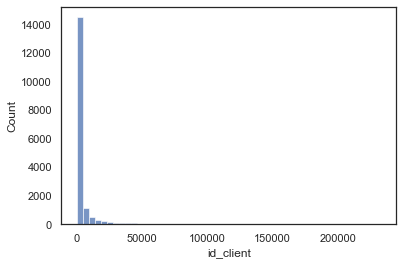

In [22]:
sns.histplot(df_movie,bins=50)

<AxesSubplot:xlabel='id_client', ylabel='Count'>

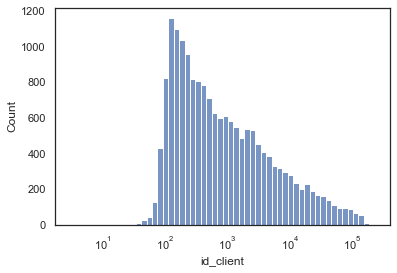

In [23]:
sns.histplot(df_movie,log_scale=True)

<AxesSubplot:xlabel='id_client', ylabel='Count'>

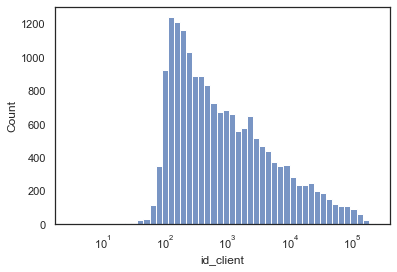

In [24]:
sns.histplot(df_movie,log_scale=True,bins=50)

Text(0, 0.5, 'Conteo')

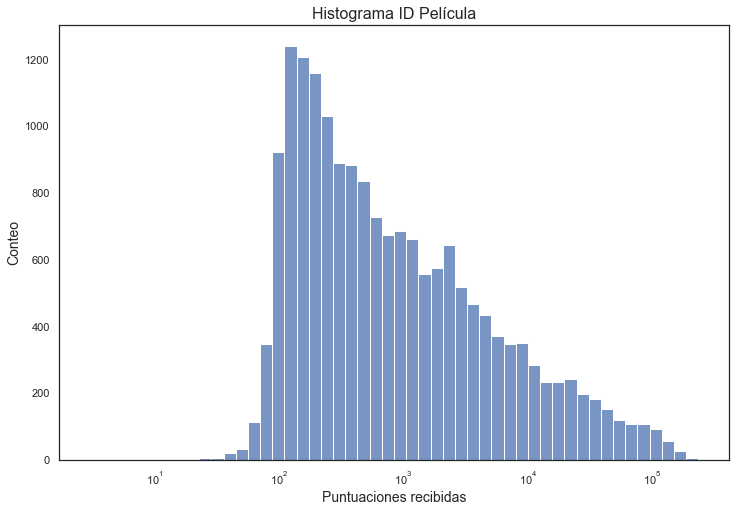

In [54]:
plt.figure(figsize=(12, 8))
sns.histplot(df_movie,log_scale=False,bins=50)
plt.title('Histograma ID Película', fontsize=16)
# Configurar título y etiquetas
plt.xlabel('Puntuaciones recibidas', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

Text(0, 0.5, 'Conteo')

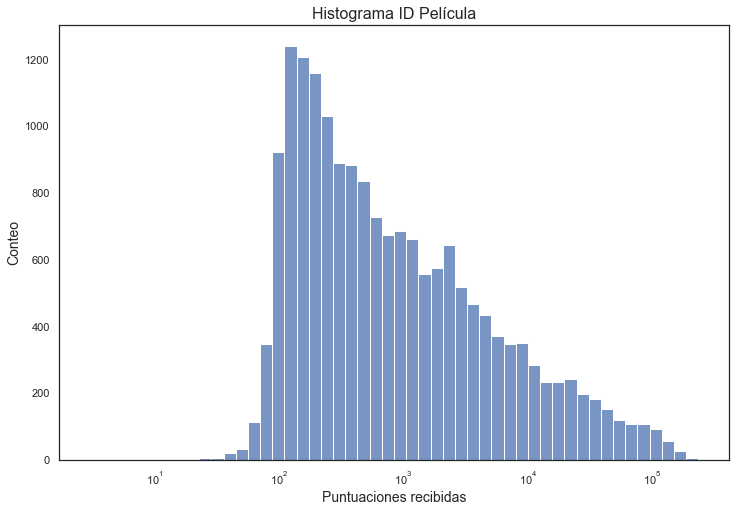

In [54]:
plt.figure(figsize=(12, 8))
sns.histplot(df_movie,log_scale=True,bins=50)
plt.title('Histograma ID Película', fontsize=16)
# Configurar título y etiquetas
plt.xlabel('Puntuaciones recibidas', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

In [26]:
df_movie.describe()

count     17770.000000
mean       5654.502307
std       16909.673286
min           3.000000
25%         192.000000
50%         561.000000
75%        2667.750000
max      232944.000000
Name: id_client, dtype: float64

In [53]:
df_movie.nlargest(20)

id_movie
5317     232944
15124    216596
14313    200832
15205    196397
1905     193941
6287     193295
11283    181508
16377    181426
16242    178068
12470    177556
15582    176539
9340     173596
6972     171991
12317    164792
2152     162597
3860     160454
15107    160326
6037     158601
4432     156183
5496     155714
Name: id_client, dtype: int64

In [28]:
for exp in [10**i for i in range(6)]:
    print(f"Menores que {exp}: {df_movie[df_movie < exp].shape[0]}\nMayores que {exp}: {df_movie[df_movie > exp].shape[0]}\n")

Menores que 1: 0
Mayores que 1: 17770

Menores que 10: 2
Mayores que 10: 17766

Menores que 100: 975
Mayores que 100: 16760

Menores que 1000: 10643
Mayores que 1000: 7125

Menores que 10000: 15728
Mayores que 10000: 2042

Menores que 100000: 17608
Mayores que 100000: 162



# RATE

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Wall time: 18.7 s


<AxesSubplot:xlabel='rate', ylabel='count'>

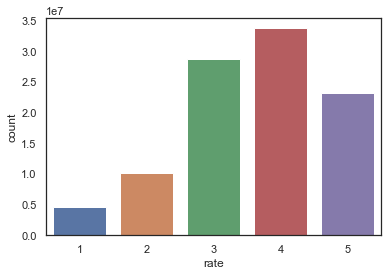

In [29]:
%%time
sns.countplot(df['rate'])

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Conteo')

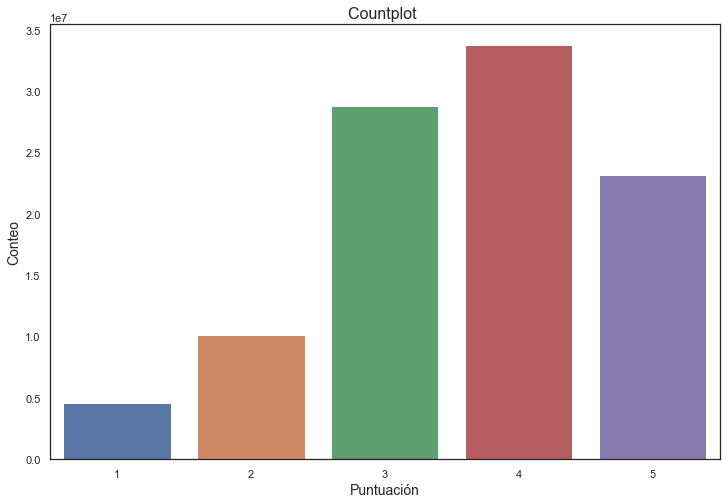

In [50]:
plt.figure(figsize=(12, 8))
sns.countplot(df['rate'])
plt.title('Countplot ', fontsize=16)
# Configurar título y etiquetas
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


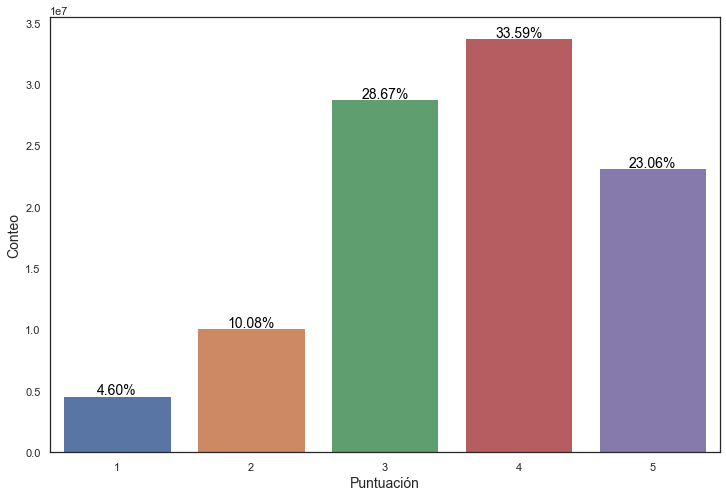

Wall time: 13.7 s


In [51]:
%%time
# Establecer el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el countplot
ax = sns.countplot(df['rate'])

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()/ df.shape[0] *100:3.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurar título y etiquetas
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

# Mostrar la gráfica
plt.show()


C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


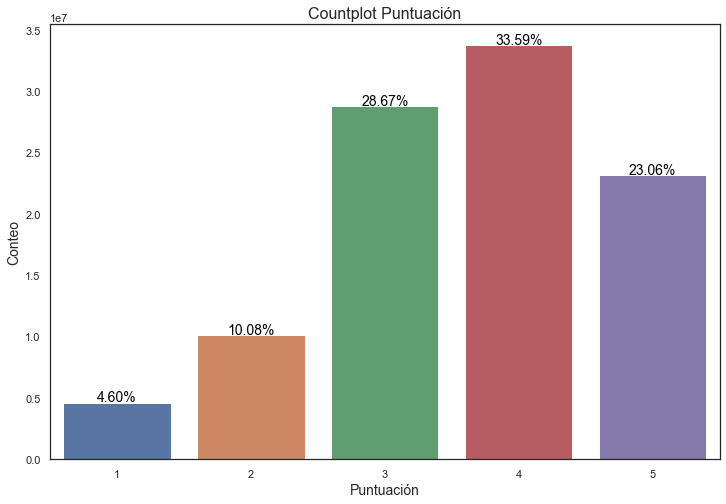

Wall time: 12.4 s


In [32]:
%%time
# Establecer el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el countplot
ax = sns.countplot(df['rate'])

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()/ df.shape[0] *100:3.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Countplot Puntuación', fontsize=16)
# Configurar título y etiquetas
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

# Mostrar la gráfica
plt.show()


In [33]:
df_rate = df['rate'].value_counts()
df_rate

4    33750958
3    28811246
5    23168232
2    10132080
1     4617990
Name: rate, dtype: int64

In [34]:
df_rate.sort_index() / df.shape[0] *100

1     4.595906
2    10.083628
3    28.673468
4    33.589558
5    23.057440
Name: rate, dtype: float64

# CLIENTE vs RATE

In [35]:
df_client_rate = df.groupby('id_client')['rate'].mean()
df_client_rate.head()

id_client
6     3.418530
7     4.011351
8     4.214286
10    3.392308
25    3.481481
Name: rate, dtype: float64

<AxesSubplot:xlabel='rate', ylabel='Density'>

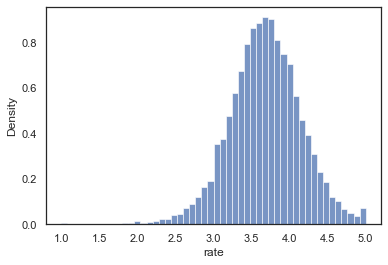

In [36]:
sns.histplot(df_client_rate,stat="density",bins=50)

In [37]:
df_client_rate2 = df_client_rate.apply(lambda x : int(x*10)/10)
df_client_rate2.head()

id_client
6     3.4
7     4.0
8     4.2
10    3.3
25    3.4
Name: rate, dtype: float64

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Conteo')

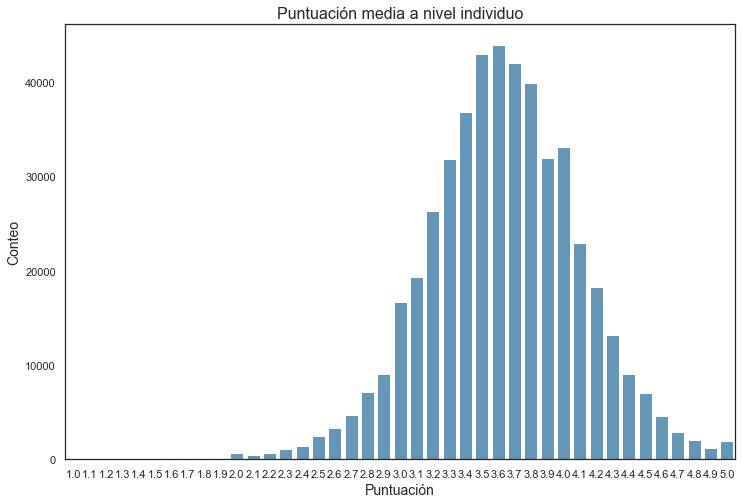

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(df_client_rate2,palette=['#5799C6'])
# Configurar título y etiquetas
plt.title('Puntuación media a nivel individuo', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

In [39]:
df_client_rate2.describe()

count    480189.000000
mean          3.627361
std           0.474095
min           1.000000
25%           3.300000
50%           3.600000
75%           3.900000
max           5.000000
Name: rate, dtype: float64

# MOVIES vs RATE

In [40]:
df_movie_rate = df.groupby('id_movie')['rate'].mean()
df_movie_rate.head()

id_movie
1    3.750916
2    3.558621
3    3.641153
4    2.739437
5    3.919298
Name: rate, dtype: float64

<AxesSubplot:xlabel='rate', ylabel='Density'>

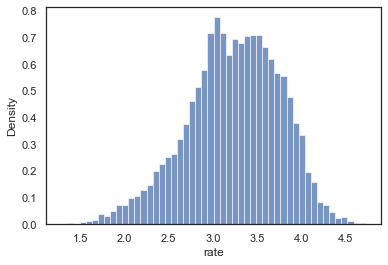

In [41]:
sns.histplot(df_movie_rate,stat="density",bins=50)

In [42]:
df_movie_rate2 = df_movie_rate.apply(lambda x : int(x*10)/10)
df_movie_rate2.head()

id_movie
1    3.7
2    3.5
3    3.6
4    2.7
5    3.9
Name: rate, dtype: float64

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Conteo')

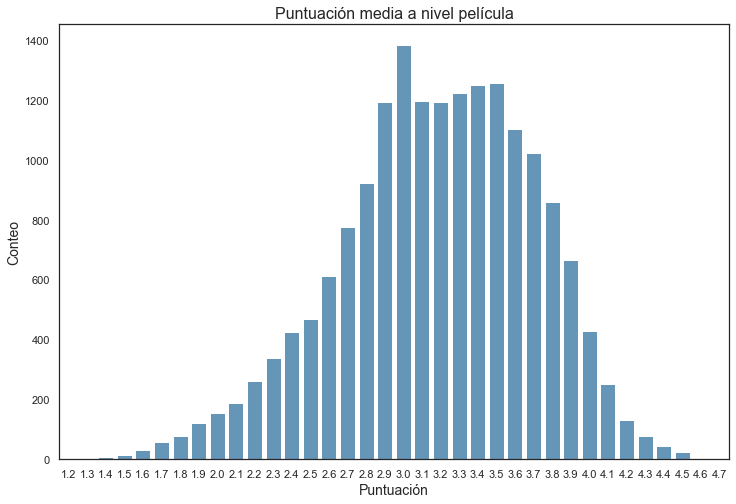

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(df_movie_rate2,palette=['#5799C6'])
# Configurar título y etiquetas
plt.title('Puntuación media a nivel película', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Conteo', fontsize=14)

In [44]:
df_movie_rate2.describe()

count    17770.000000
mean         3.178452
std          0.526422
min          1.200000
25%          2.800000
50%          3.200000
75%          3.600000
max          4.700000
Name: rate, dtype: float64

# Rate day

In [6]:
#df['rate_day'] = pd.to_datetime(df['rate_day'], format='%Y-%m-%d')
df['rate_day'] = pd.to_datetime(df['rate_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480506 entries, 0 to 100480505
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   id_movie   int64         
 1   id_client  int64         
 2   rate       int64         
 3   rate_day   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.0 GB


In [46]:
df.head()

,id_movie,id_client,rate,rate_day
0,1,822109,5,2005-05-13
1,1,885013,4,2005-10-19
2,1,30878,4,2005-12-26
3,1,823519,3,2004-05-03
4,1,893988,3,2005-11-17


In [47]:
df['rate_day'].describe()

<ipython-input-47-c716b6284569>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['rate_day'].describe()


count               100480506
unique                   2182
top       2005-01-19 00:00:00
freq                   737570
first     1999-11-11 00:00:00
last      2005-12-31 00:00:00
Name: rate_day, dtype: object

In [48]:
df_rate_day_count = df['rate_day'].value_counts()
df_rate_day_count

2005-01-19    737570
2005-04-06    339811
2005-06-01    238967
2005-06-27    236187
2005-05-31    234062
               ...  
1999-12-26        20
1999-12-14        15
1999-12-06        12
1999-12-20         6
1999-12-15         5
Name: rate_day, Length: 2182, dtype: int64

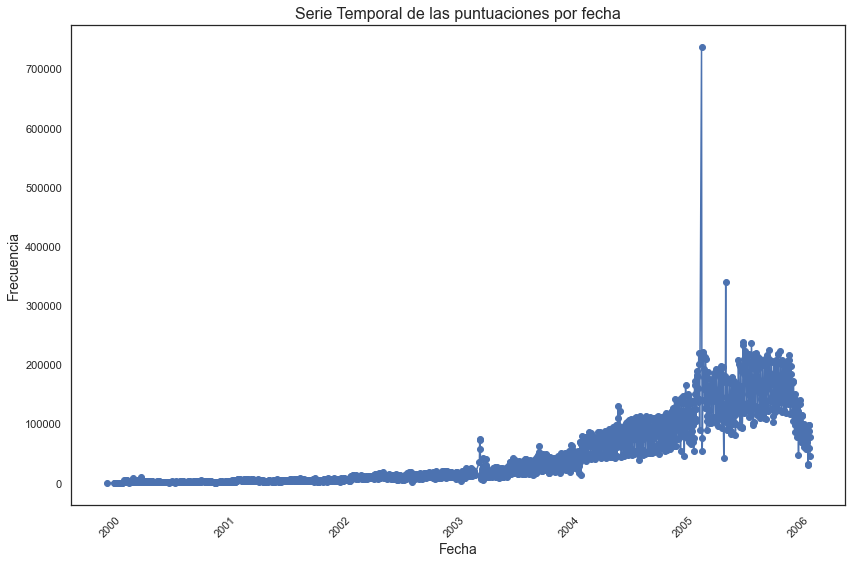

In [49]:
# Crear el gráfico de la serie temporal
plt.figure(figsize=(12, 8))  # Ancho x Alto

df_rate_day_count.plot(marker='o', linestyle='-')
# Configurar etiquetas y título
plt.title('Serie Temporal de las puntuaciones por fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [8]:
df['rate_day'].dt.year.value_counts()

2005    53250072
2004    30206574
2003     9985337
2002     4342871
2001     1769031
2000      924443
1999        2178
Name: rate_day, dtype: int64